In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
train = pd.read_csv('C:\\Users\\akhil\\Desktop\\INSOFE\\Final_Hackathon\\final_train_data_32bit.csv')

Wall time: 49 s


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20511298 entries, 0 to 20511297
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   farm_id                object 
 1   ingredient_type        object 
 2   yield                  float64
 3   farm_area              float64
 4   farming_company        object 
 5   deidentified_location  object 
 6   temp_obs               float64
 7   cloudiness             float64
 8   wind_direction         float64
 9   dew_temp               float64
 10  pressure_sea_level     float64
 11  precipitation          float64
 12  wind_speed             float64
 13  month                  int64  
 14  date                   int64  
 15  hour                   int64  
dtypes: float64(9), int64(3), object(4)
memory usage: 2.4+ GB


In [4]:
float_cols = list(train.select_dtypes('float64').columns)
int_cols = list(train.select_dtypes('int64').columns)
obj_cols = list(train.select_dtypes('object').columns)

In [5]:
train[float_cols] = train[float_cols].astype('float32')

In [6]:
train[int_cols] = train[int_cols].astype('category')

In [7]:
train['cloudiness'] = train['cloudiness'].astype('category')

In [8]:
train[obj_cols] = train[obj_cols].astype('category')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20511298 entries, 0 to 20511297
Data columns (total 16 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   farm_id                category
 1   ingredient_type        category
 2   yield                  float32 
 3   farm_area              float32 
 4   farming_company        category
 5   deidentified_location  category
 6   temp_obs               float32 
 7   cloudiness             category
 8   wind_direction         float32 
 9   dew_temp               float32 
 10  pressure_sea_level     float32 
 11  precipitation          float32 
 12  wind_speed             float32 
 13  month                  category
 14  date                   category
 15  hour                   category
dtypes: category(8), float32(8)
memory usage: 802.1 MB


### Checking the data distribution with an interval of 10 percentile.

In [10]:
new_df = train.describe([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [11]:
new_df

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07
mean,1.965197e+03,9.427995e+03,1.576584e+01,1.633978e+02,7.731022e+00,9.159902e+02,1.319978e+00,3.502568e+00
std,1.521097e+05,1.056413e+04,1.078464e+01,1.098830e+02,1.001785e+01,1.005376e+02,6.828942e+00,2.268532e+00
min,0.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,-3.500000e+01,9.385000e+02,-1.000000e+00,0.000000e+00
1%,0.000000e+00,1.726138e+02,-1.170000e+01,0.000000e+00,-1.830000e+01,9.385000e+02,-1.000000e+00,0.000000e+00
10%,3.275000e-01,1.176152e+03,1.100000e+00,0.000000e+00,-5.600000e+00,1.005800e+03,0.000000e+00,0.000000e+00
20%,1.085000e+01,2.289409e+03,6.700000e+00,6.000000e+01,-1.100000e+00,1.009800e+03,0.000000e+00,1.500000e+00
30%,2.599000e+01,3.683511e+03,1.060000e+01,1.100000e+02,2.000000e+00,1.012100e+03,0.000000e+00,2.100000e+00
40%,4.672500e+01,5.157603e+03,1.390000e+01,1.400000e+02,5.400000e+00,1.014100e+03,0.000000e+00,2.600000e+00
50%,7.768000e+01,6.683070e+03,1.670000e+01,1.700000e+02,8.900000e+00,1.015900e+03,0.000000e+00,3.100000e+00


In [12]:
train.sort_values(by='yield', inplace=True)

In [13]:
train.tail()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
9024674,fid_72059,ing_y,21844500.0,30925.921875,Obery Farms,location 2532,20.0,3.0,140.0,17.200001,1012.799988,8.0,3.6,6,13,8
17531997,fid_72059,ing_y,21847900.0,30925.921875,Obery Farms,location 2532,3.9,2.0,190.0,1.100000,1028.900024,0.0,2.1,11,9,14
8860622,fid_72059,ing_y,21874500.0,30925.921875,Obery Farms,location 2532,21.1,0.0,140.0,17.799999,1007.099976,0.0,6.2,6,10,8
8863090,fid_72059,ing_y,21889900.0,30925.921875,Obery Farms,location 2532,21.1,0.0,130.0,17.799999,1007.500000,0.0,5.1,6,10,9
9027029,fid_72059,ing_y,21904700.0,30925.921875,Obery Farms,location 2532,19.4,3.0,50.0,17.200001,1014.400024,0.0,6.2,6,13,9


In [14]:
idx = list(train[train['yield'] > train['yield'].quantile(0.99)].index)

In [15]:
idx[0:5]

[8750366, 5112035, 3245833, 3216706, 19303010]

In [16]:
len(idx)

205110

In [17]:
train.drop(idx, inplace=True)
train.reset_index(drop=True, inplace=True)
# as the values are too huge compared to other values, unable to plot the yield column, 
# so removing all those rows which are having yield greater than 99%, yield at 99% is 5541

In [18]:
train.tail()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
20306183,fid_14967,ing_x,5541.72998,16797.419922,Sanderson Farms,location 5410,32.799999,0.0,340.0,17.799999,1015.200012,0.0,4.1,8,26,22
20306184,fid_40333,ing_y,5541.75000,63138.179688,Freight Farms,location 2532,-7.200000,3.0,230.0,-11.700000,1008.200012,0.0,1.5,1,14,1
20306185,fid_40333,ing_y,5541.75000,63138.179688,Freight Farms,location 2532,-5.600000,2.0,120.0,-8.900000,1011.500000,0.0,5.1,12,28,9
20306186,fid_40333,ing_y,5541.75000,63138.179688,Freight Farms,location 2532,-8.300000,3.0,80.0,-11.100000,1005.200012,0.0,2.6,1,14,8
20306187,fid_40333,ing_y,5541.75000,63138.179688,Freight Farms,location 2532,-10.000000,3.0,230.0,-13.300000,1025.699951,3.0,1.5,2,12,4


Feature: yield


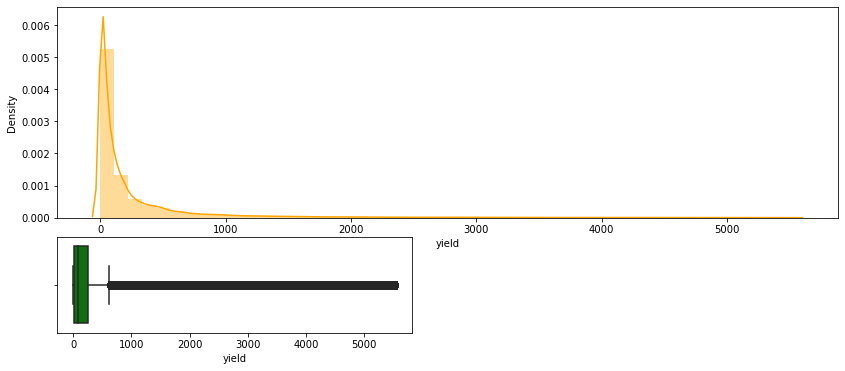

Wall time: 5min 58s


In [19]:
%%time

fig = plt.figure(figsize=(14,6))
gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,0])

    
print('Feature: {}'.format('yield'))
sns.distplot(train['yield'], ax = ax1, kde = True, color='orange')

sns.boxplot(x = 'yield', data = train, ax = ax2, color= 'green')
    
plt.show()

#### Around 90% of the data is between the wiskers, but 10% of the data is outside the wiskers. It's a highly right skewed data (even without those extreme values)

In [20]:
fl_cols = list(train.select_dtypes(['float32', 'int32']).columns[1:])

In [21]:
print(fl_cols)

['farm_area', 'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed']


In [22]:
from sklearn.feature_selection import f_regression

x = f_regression(train[fl_cols], train['yield'])

In [23]:
x = pd.DataFrame(data=x, index=['F Score', 'p_value'], columns=fl_cols).T
x

,F Score,p_value
farm_area,2.926920e+06,0.000000e+00
temp_obs,5.958162e+04,0.000000e+00
wind_direction,1.990428e+03,0.000000e+00
dew_temp,1.591567e+04,0.000000e+00
pressure_sea_level,1.257453e+05,0.000000e+00
precipitation,1.743742e+04,0.000000e+00
wind_speed,5.492295e+02,1.858793e-121


In [24]:
## Inidvidually all numerical columns are significant in determining the yield

In [25]:
np.random.seed(340)
idx_new = list(np.random.randint(0, train.shape[0], 300000))

In [26]:
train.shape[0]

20306188

In [27]:
new_df = train.loc[idx_new, : ].copy()

In [28]:
new_df.shape

(300000, 16)

Wall time: 5min 14s


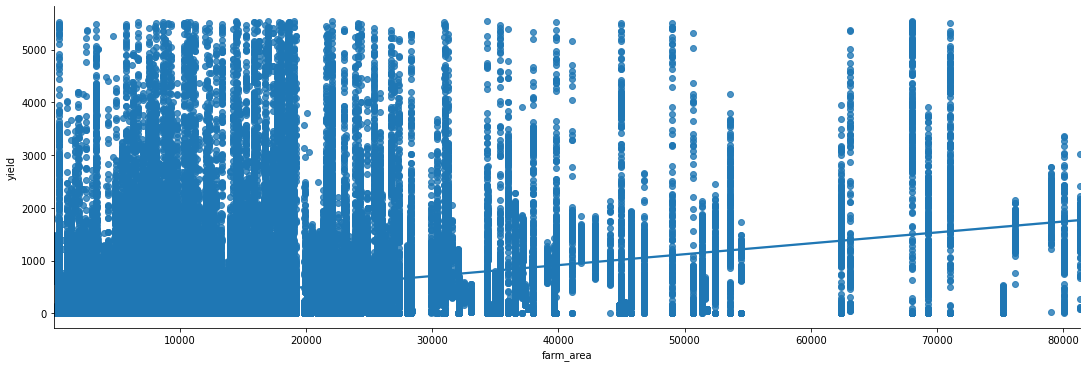

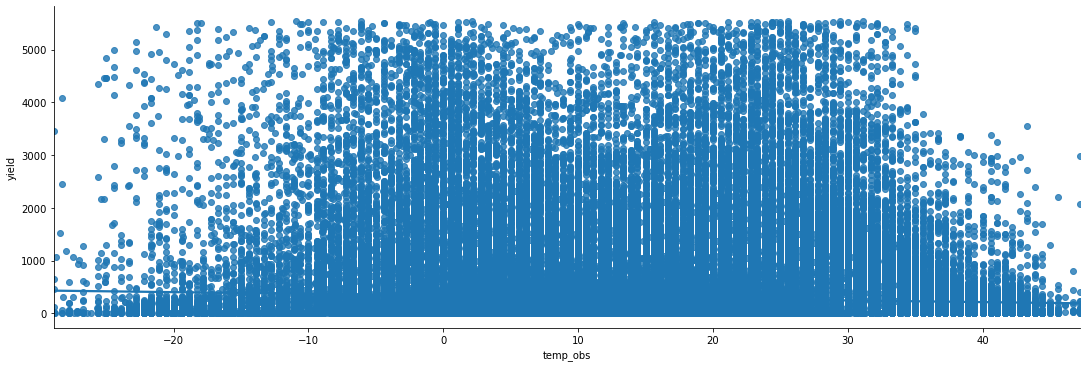

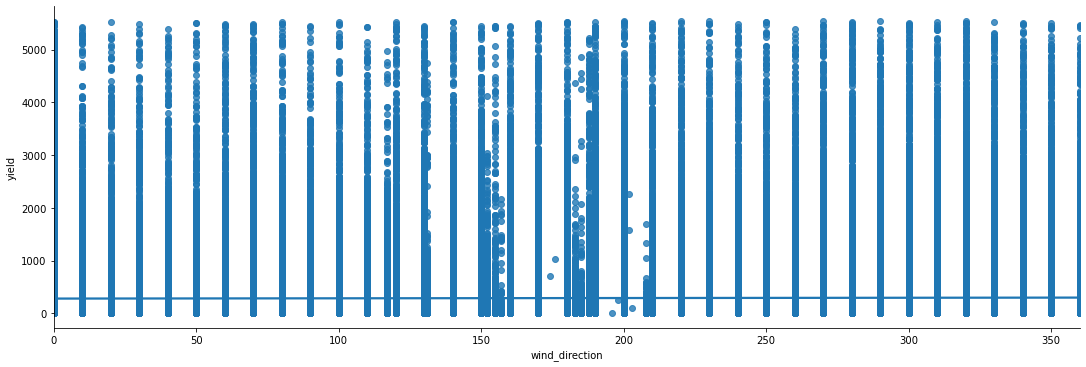

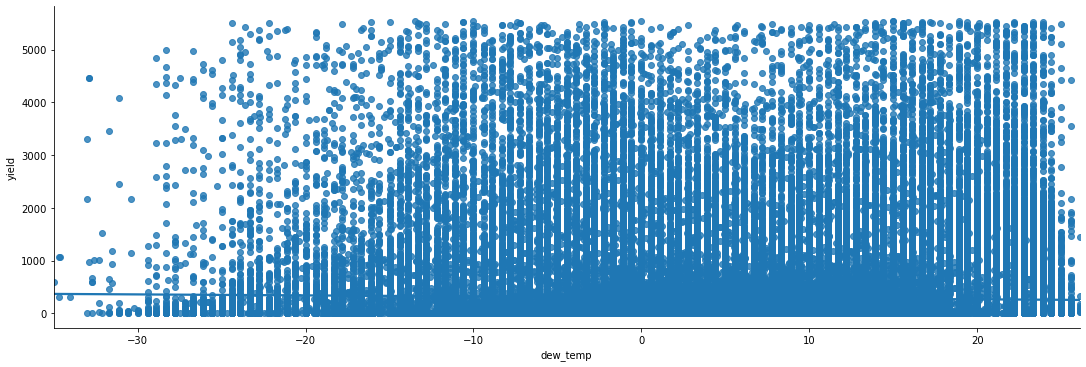

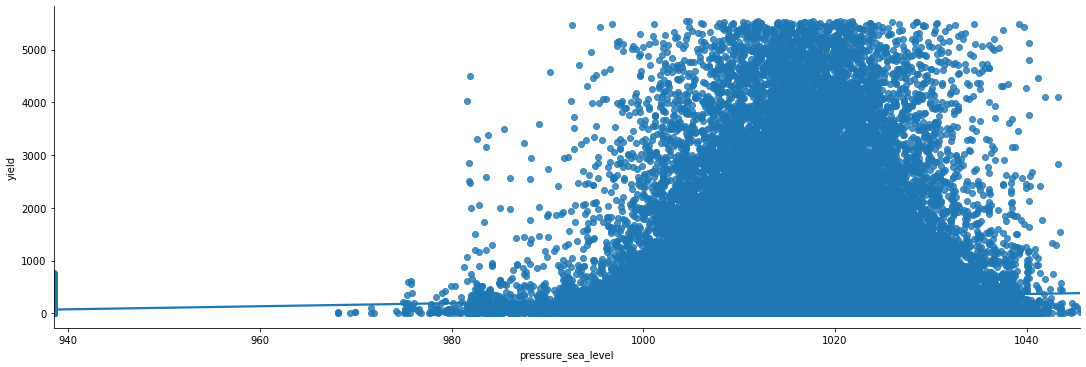

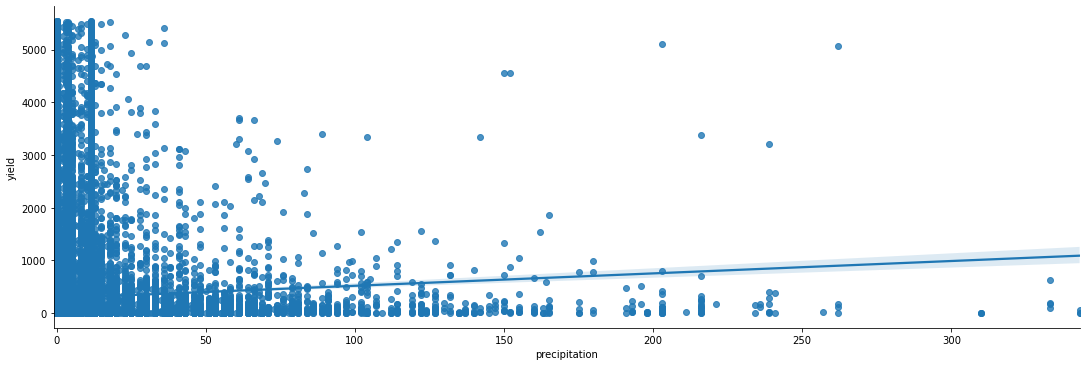

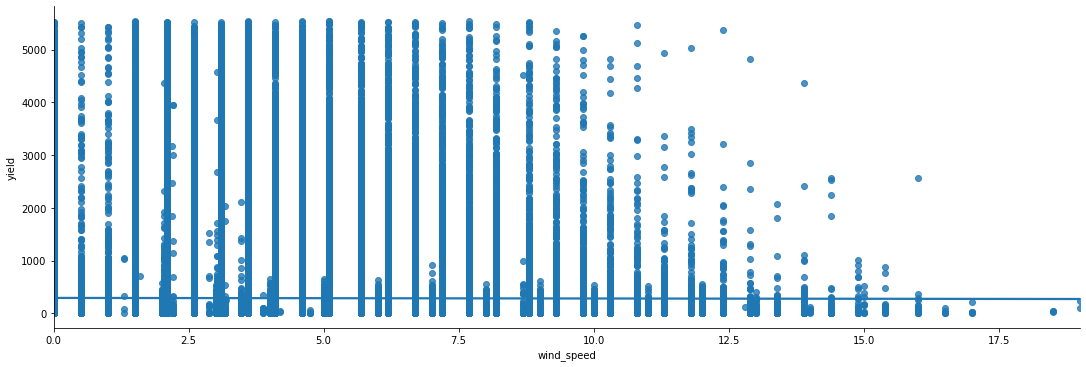

In [29]:
%%time

for x in new_df.select_dtypes(['float32']).columns[1:]:
    sns.lmplot(x=x, y='yield', data=new_df, height=5, aspect=3)

In [30]:
# Most of the farm area is below 40000
# Temperature, wind_directions, dew_temperature, wind_speed, were spread equally.
# Precipitation and pressure sea level are concentrated between a particular range.

Wall time: 6.91 s


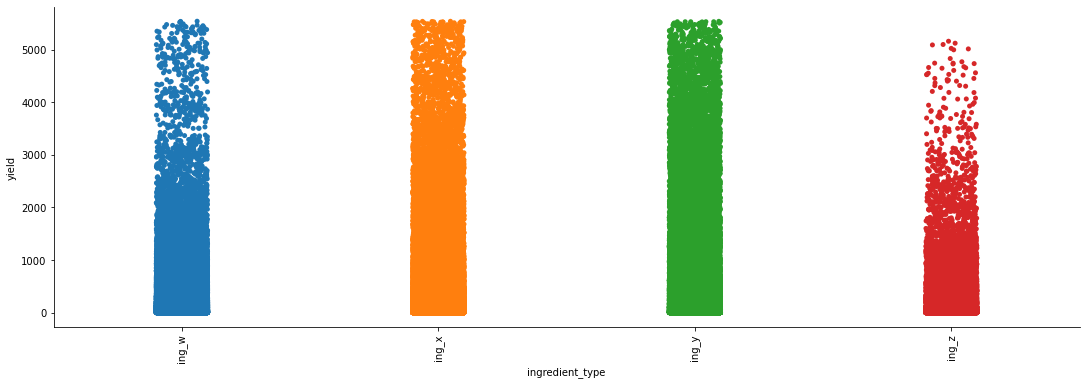

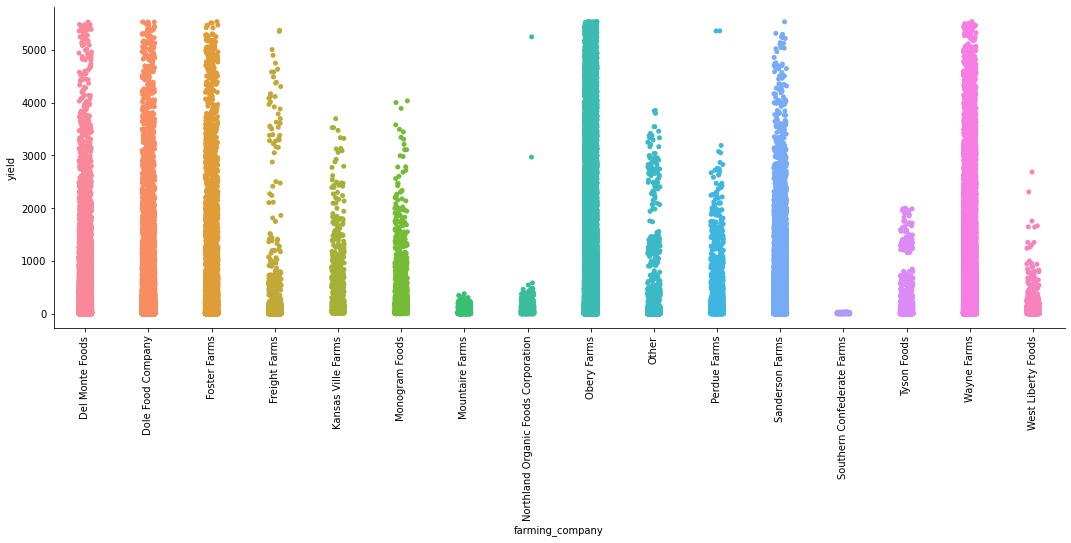

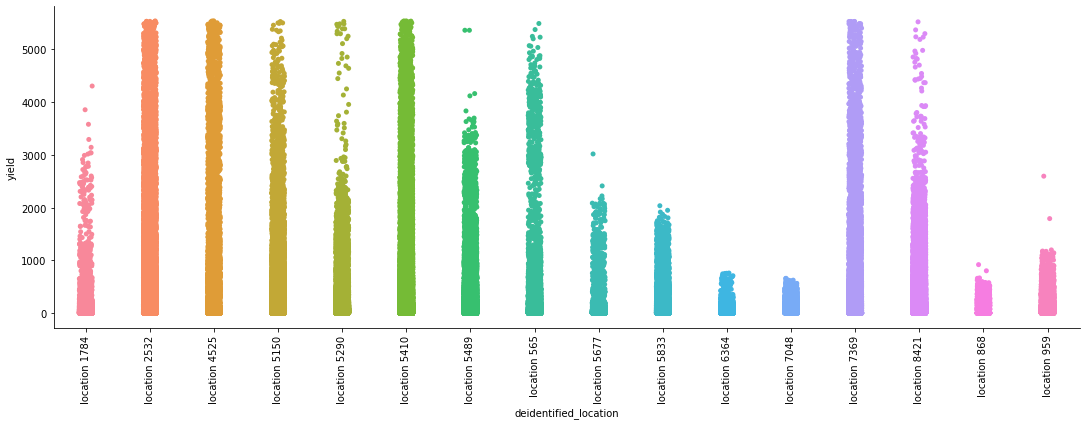

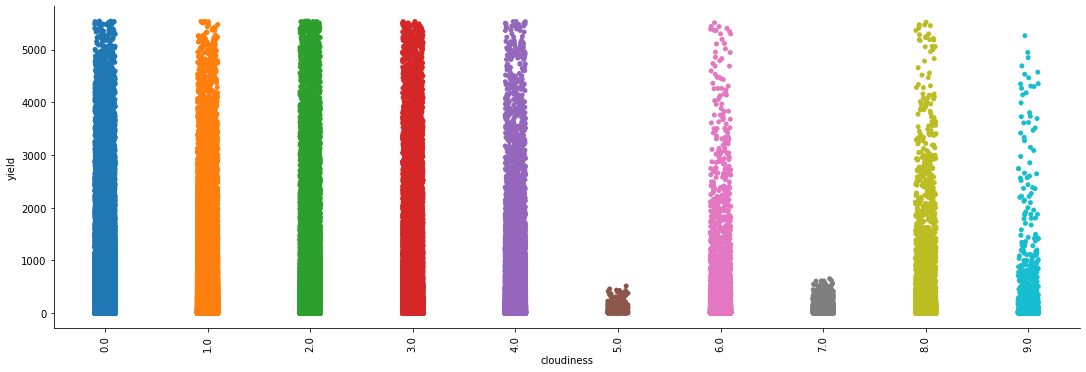

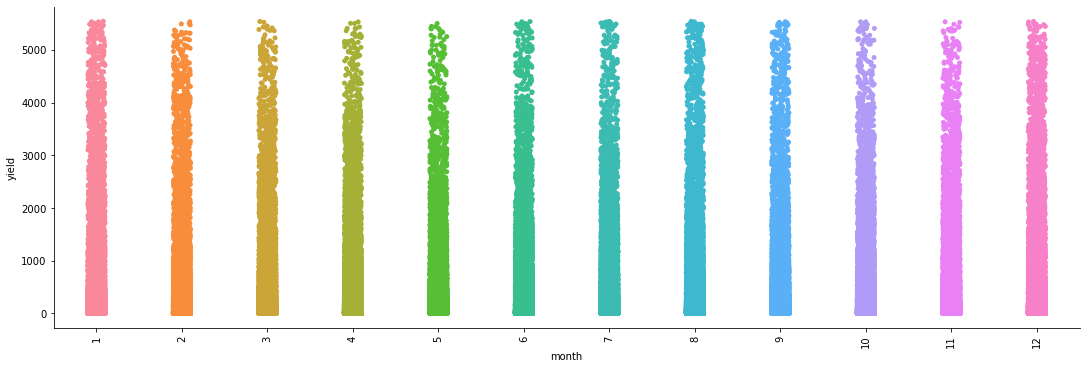

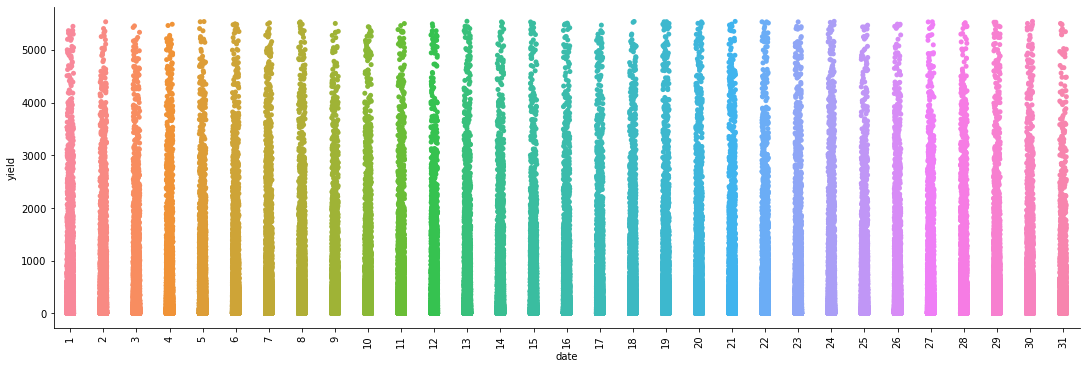

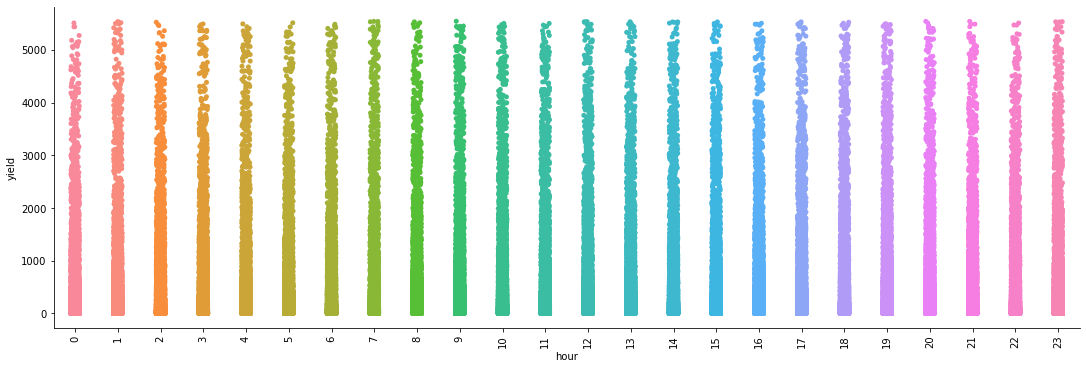

In [31]:
%%time
for x in new_df.select_dtypes(['category']).columns[1:]:
    sns.catplot(x=x, y='yield', data=new_df, height=5, aspect=3)
    plt.xticks(rotation = 90)

In [32]:
### The data is almost equally spread for all the classes for each feature

In [33]:
f_id = list(new_df['farm_id'].unique())

In [34]:
farm_yield = pd.DataFrame(columns=['farm_id', 'yield_sum'])

In [35]:
farm_yield

,farm_id,yield_sum


In [36]:
for x in f_id:
    yield_sum = sum(new_df.loc[new_df['farm_id'] ==x, 'yield'])
    farm_yield = farm_yield.append(pd.Series([x, yield_sum], index=farm_yield.columns), ignore_index=True)

In [37]:
farm_yield.head()

,farm_id,yield_sum
0,fid_57916,84260.517342
1,fid_24151,8002.099991
2,fid_60155,26433.916182
3,fid_46989,17427.355161
4,fid_96320,113049.500100


In [38]:
farm_yield.tail()

,farm_id,yield_sum
1429,fid_48661,2374.000000
1430,fid_20789,6117.242506
1431,fid_56848,5603.398998
1432,fid_19864,360.970005
1433,fid_20058,21.662500


In [39]:
farm_yield.sort_values(by='yield_sum', inplace=True, ascending=False)
farm_yield.reset_index(drop=True, inplace=True)

In [40]:
idx = list(range(20)) + list(range(1414,1434))

In [41]:
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433]


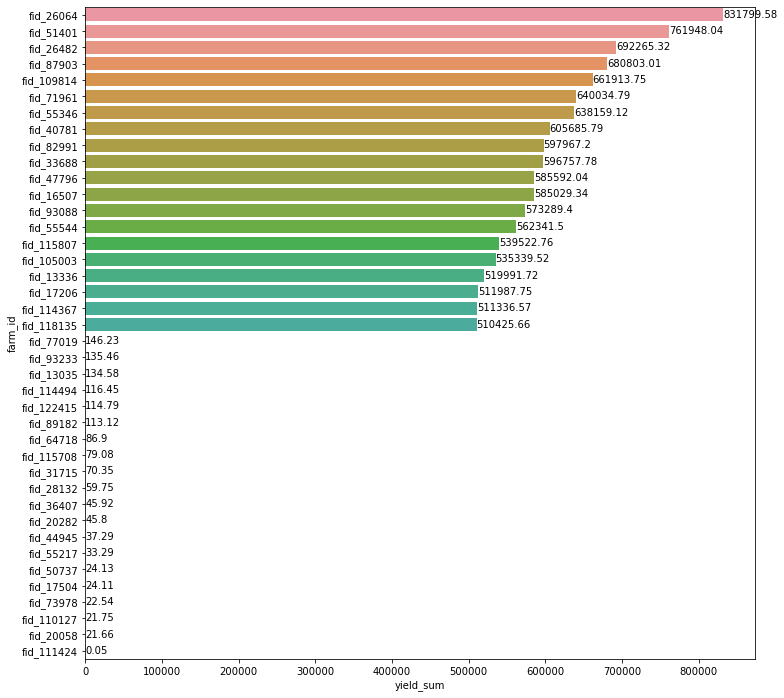

In [42]:
plt.figure(figsize = (12,12))
bar_plot1 = sns.barplot(y = farm_yield.loc[idx, 'farm_id'],x = farm_yield.loc[idx, 'yield_sum']);
for p in bar_plot1.patches:
        x_value = p.get_width()
        y_value = p.get_y() + p.get_height()
        bar_plot1.text(x_value, y_value -0.25, round(x_value,2))

In [43]:
## We can see that there is a huge contrast in the yield, between top and bottom farm_ids, bottom farm_id's yield, 
## there wasn't nearly any yield preprocessing in a few farm plants 

In [44]:
float_cols

['yield',
 'farm_area',
 'temp_obs',
 'cloudiness',
 'wind_direction',
 'dew_temp',
 'pressure_sea_level',
 'precipitation',
 'wind_speed']

In [45]:
new_df.select_dtypes('float32').columns

Index(['yield', 'farm_area', 'temp_obs', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed'],
      dtype='object')

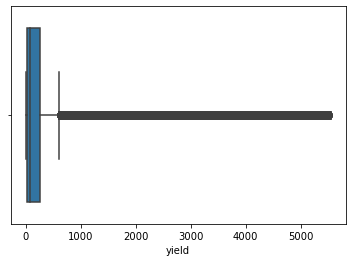

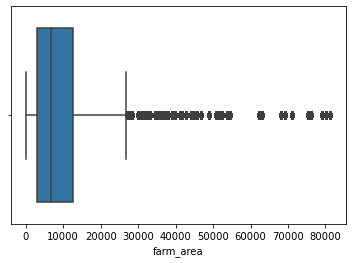

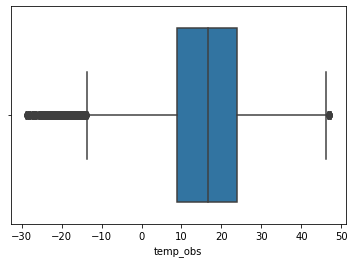

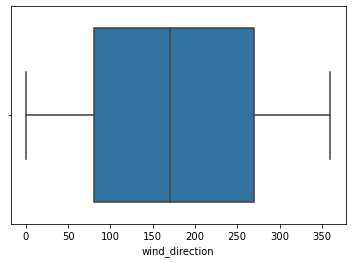

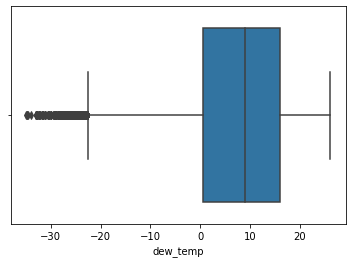

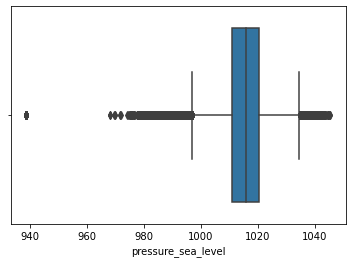

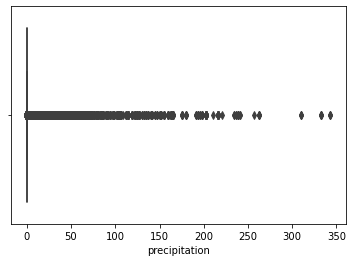

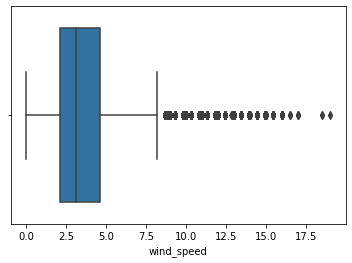

In [46]:
for x in new_df.select_dtypes('float32').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=x, data=new_df)

In [47]:
## There are a few values which are not inside the wiskers, but I would like to consider them while building the model,
# because they can be the extreme weather conditions which might destroy the crop